<a href="https://colab.research.google.com/github/MohiteAkshay/Project-4-Distracted-Driver-MultiAction-Classification/blob/master/Distracted_Driver_Predicition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
from fastai.vision import *
from fastai.metrics import error_rate
import urllib
warnings.filterwarnings("ignore")

In [ ]:
!wget https://uc936b4829504721e132031f8f32.dl.dropboxusercontent.com/cd/0/get/A8wiaulx6xdTxXb8HIiQYpzzb2_NrJSDWawLK4A8a3MUWVc_kOG3UQviP7Gcu4iCVGtloNUNcOw6aiRgh-elhqOfN8pK5sDCS7hhaHz1AONuNQ/file?_download_id=438542720624845567555295781751163994931615710307910072125777052965&_notify_domain=www.dropbox.com&dl=1

--2020-08-03 13:33:16--  https://uc936b4829504721e132031f8f32.dl.dropboxusercontent.com/cd/0/get/A8wiaulx6xdTxXb8HIiQYpzzb2_NrJSDWawLK4A8a3MUWVc_kOG3UQviP7Gcu4iCVGtloNUNcOw6aiRgh-elhqOfN8pK5sDCS7hhaHz1AONuNQ/file?_download_id=438542720624845567555295781751163994931615710307910072125777052965
Resolving uc936b4829504721e132031f8f32.dl.dropboxusercontent.com (uc936b4829504721e132031f8f32.dl.dropboxusercontent.com)... 162.125.65.15, 2620:100:6021:15::a27d:410f
Connecting to uc936b4829504721e132031f8f32.dl.dropboxusercontent.com (uc936b4829504721e132031f8f32.dl.dropboxusercontent.com)|162.125.65.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4289457691 (4.0G) [application/binary]
Saving to: ‘file?_download_id=438542720624845567555295781751163994931615710307910072125777052965’

file?_download_id=4 100%[===================>]   3.99G  16.6MB/s    in 3m 15s  

2020-08-03 13:36:31 (21.0 MB/s) - ‘file?_download_id=43854272062484556755529578175116399493161571030791007

In [ ]:
!unzip /content/file?_download_id=438542720624845567555295781751163994931615710307910072125777052965

Archive:  /content/file?_download_id=438542720624845567555295781751163994931615710307910072125777052965
  inflating: sample_submission.csv   
  inflating: driver_imgs_list.csv    
  inflating: imgs.zip                


In [ ]:
!rm /content/file?_download_id=438542720624845567555295781751163994931615710307910072125777052965

In [ ]:
!unzip /content/imgs.zip

In [ ]:
!rm /content/imgs.zip

In [ ]:
path = Path('/content/Distract_driv')
path.ls()

[PosixPath('/content/Distract_driv/train')]

In [ ]:
data = ImageDataBunch.from_folder(path,test='/content/Distract_driv/test', ds_tfms=get_transforms(),valid_pct=0.2
                        , size=224, bs = 20).normalize(imagenet_stats)

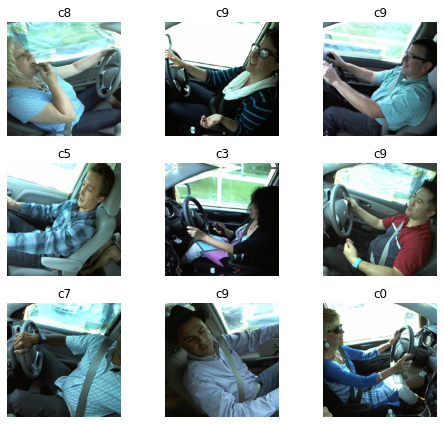

In [ ]:
data.show_batch(rows=3,figsize=(7,6))

In [ ]:
print(data.classes);len(data.classes)

['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']


10

In [ ]:
learn=cnn_learner(data,models.resnet34,metrics=error_rate)

In [ ]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.699092,0.279375,0.082293,09:17
1,0.380983,0.132246,0.036574,09:23


In [ ]:
learn.save('Stage-1')

In [ ]:
interp=ClassificationInterpretation.from_learner(learn)
losses, idxs= interp.top_losses()

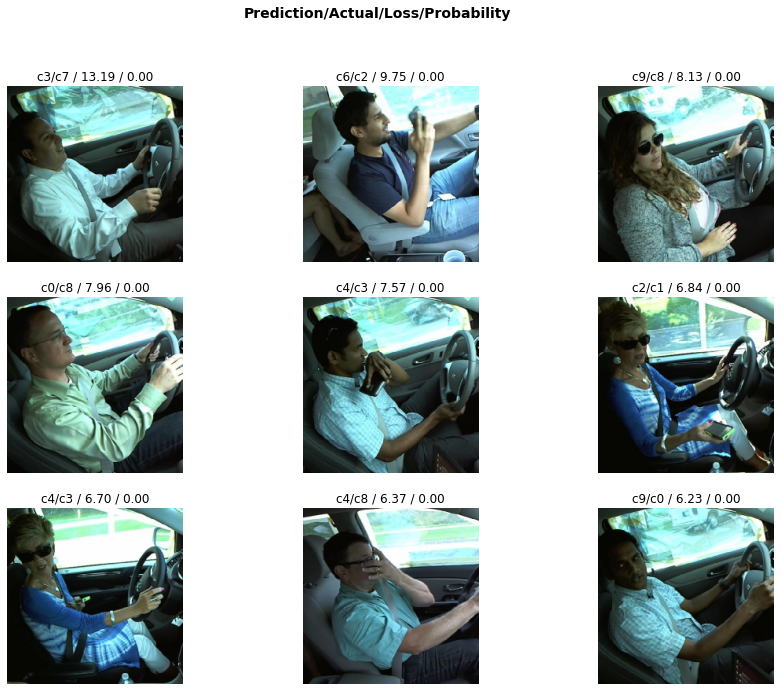

In [ ]:
interp.plot_top_losses(9,figsize=(15,11))

In [ ]:
interp.most_confused(min_val=2)

[('c0', 'c9', 20),
 ('c9', 'c0', 17),
 ('c8', 'c6', 13),
 ('c8', 'c9', 11),
 ('c0', 'c3', 8),
 ('c6', 'c8', 7),
 ('c8', 'c4', 7),
 ('c8', 'c2', 6),
 ('c6', 'c1', 5),
 ('c8', 'c0', 5),
 ('c8', 'c1', 5),
 ('c9', 'c8', 5),
 ('c5', 'c0', 4),
 ('c9', 'c3', 4),
 ('c0', 'c4', 3),
 ('c1', 'c2', 3),
 ('c3', 'c4', 3),
 ('c6', 'c2', 3),
 ('c7', 'c9', 3),
 ('c8', 'c7', 3),
 ('c9', 'c4', 3),
 ('c0', 'c1', 2),
 ('c1', 'c9', 2),
 ('c4', 'c0', 2),
 ('c4', 'c3', 2),
 ('c7', 'c8', 2),
 ('c9', 'c6', 2)]

In [ ]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


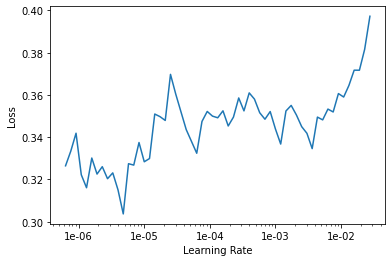

In [ ]:
learn.recorder.plot()

In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(2,max_lr=slice(1e-6,1e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.261797,0.097081,0.027431,09:33
1,0.209904,0.089755,0.023863,09:26


In [ ]:
learn.save('Stage-2')

In [ ]:
log_preds, y = learn.TTA()
accuracy(log_preds, y)

tensor(0.9799)

In [ ]:
preds, y, losses = learn.get_preds(ds_type=DatasetType.Test, with_loss=True)
y = torch.argmax(preds, dim=1)

In [ ]:
test_predictions_direct = [data.classes[int(x)] for x in y]
test_predictions_direct

In [ ]:
import os
entries = os.listdir('/content/Distract_driv/test')
entries

In [ ]:
submission = pd.DataFrame({ 'imgname': entries, 'label': test_predictions_direct })
submission.to_csv('classification_results.csv', index=False)